In [ ]:
'Shree ganesh'

'Shree ganesh'

# Introduction:

The given project is relevant in today's world because credit card approval is a critical process for banks and financial sectors. In India, with the growing demand for credit, the number of credit card applications is increasing rapidly. However, manual traditional credit assessment methods are time-consuming and may lead to potential errors and delays.

However, with the increasing demand for digital banking services, machine learning models help to convert into online credit card applications, providing an efficient and convenient solution for customers to apply for credit cards.

The datasets and the features are described as follows:

1.Credit_card.csv

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

2.Credit_card_label.csv

Ind_ID: Client ID

Label: 0 is application approved and 1 is application rejected.

# Objective:

The objective of this project is to build a machine learning model that accurately predicts credit card approval insights. The model can provide insights into the most important factors that impact on  credit card approval, allowing banks to make informed decisions quickly and accurately. This can result in a faster and more efficient credit card approval process, reducing the time and cost associated with manual credit assessment methods.

This model is really helpful for banking and fincial sectors to take quick desicion in accurate and efficient way.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

# Hypothesis:

1.   A person with low income is not getting credit card approval.
2.   Logistic regression is going to work better than other ML algorithm for dataset



In [ ]:
import pandas as pd

# Reading the datasets
data_1 = pd.read_csv("Credit_card.csv")
data_2 = pd.read_csv("Credit_card_label.csv")
df1 = data_1.copy()  # Creating a copy of the dataset
df2 = data_2.copy()  # Creating a copy of the dataset

In [ ]:
# Showing first 5 rows
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df1.tail()    # Showing last 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [ ]:
df1.shape   # Shape of the dataset

(1548, 18)

In [ ]:
df2.head()   # showing first 5 rows

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
df2.tail()   # showing last 5 rows

,Ind_ID,label
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0
1547,5053790,0


In [ ]:
df2.shape  # Shape of the dataset

(1548, 2)

Here we have seen both data set having same rows and common column '	Ind_ID' so we need to merge them based on Ind_ID.

In [ ]:
Data = pd.merge(df1,df2,how = 'inner')   # Using inner join method to merge two dataframes

# Data Exploration:

In [ ]:
Data.head()   # showing first 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
Data.tail()   # showing last 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
Data.shape   # Shape of the dataset

(1548, 19)

In [ ]:
Data.info()   # Basic informations about dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
Data.describe(include = "all")   # Describing the dataset


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
Data.nunique()  # Showing how many unique values are present in each column

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

There may be some cases where same person applied more than one time so data set having some duplicate values hence  Now we are going to check duplicate entries in the dataset.

In [ ]:
print(Data.duplicated().value_counts())   # Checking duplicate entries

False    1548
dtype: int64


In [ ]:
# checking for duplicate entries without considering the 'Ind_ID' column
duplicates = Data.duplicated(subset=['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'])
print(duplicates.value_counts())

False    1386
True      162
dtype: int64


In [ ]:
Data.shape  # Shape before removing duplicates

(1548, 19)

In [ ]:
# removeing duplicate rows without considering the 'Ind_ID' column
Data_1= Data.drop_duplicates(subset=['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'])

In [ ]:
Data_1.shape   # Shape after removing duplicates

(1386, 19)

In [ ]:
# find out the null values
Data_1.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    438
Family_Members       0
label                0
dtype: int64

In [ ]:
Data.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

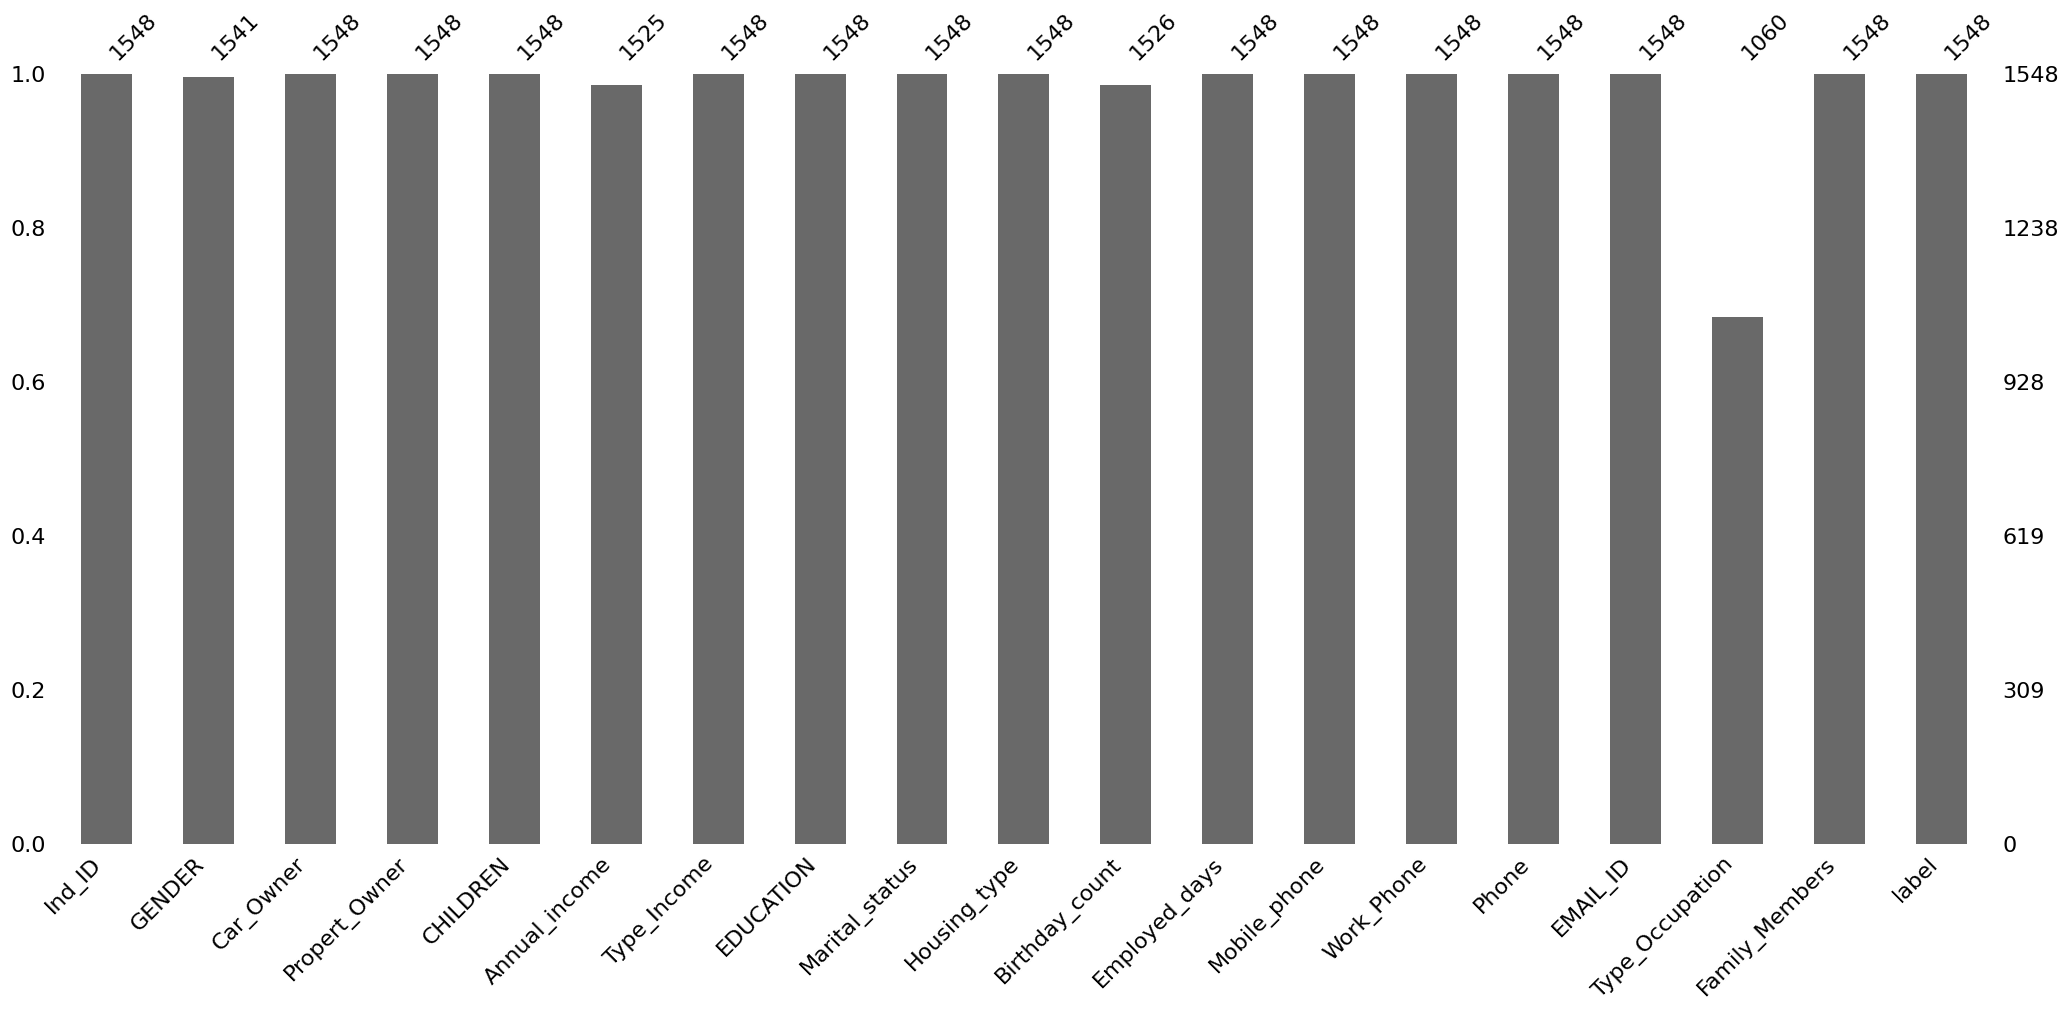

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(Data)

<Axes: >

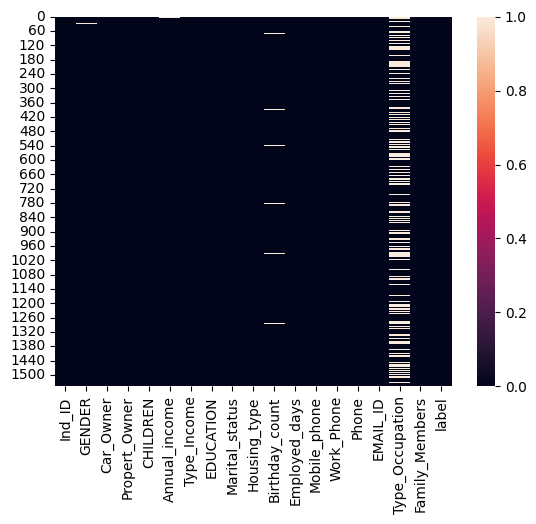

In [ ]:
# visualising the missing values
sns.heatmap(Data.isnull())

In [ ]:
# Imputing the null values with mean values
Data.fillna(Data.mean(), inplace=True)

print(Data)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0   180000.00000   
1     5009744      F         Y             N         0   315000.00000   
2     5009746      F         Y             N         0   315000.00000   
3     5009749      F         Y             N         0   191399.32623   
4     5009752      F         Y             N         0   315000.00000   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0   191399.32623   
1544  5023655      F         N             N         0   225000.00000   
1545  5115992      M         Y             Y         2   180000.00000   
1546  5118219      M         Y             N         0   270000.00000   
1547  5053790      F         Y             Y         0   225000.00000   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

<ipython-input-132-1c4889a47911>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.fillna(Data.mean(), inplace=True)


In [ ]:
# finding the null values.
Data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# replace missing values
Data['Type_Occupation'].fillna('other',inplace=True)

print(Data['Type_Occupation'])

0             other
1             other
2             other
3             other
4             other
           ...     
1543       Managers
1544    Accountants
1545       Managers
1546        Drivers
1547          other
Name: Type_Occupation, Length: 1548, dtype: object


In [ ]:
# Deleting the null values in the Gender column
Data=Data.dropna(subset=["GENDER"])

In [ ]:
Data.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [ ]:
# count the rows and columns
Data.shape

(1541, 19)

In [ ]:
Data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1541 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   CHILDREN         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   EDUCATION        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Birthday_count   1541 non-null   float64
 11  Employed_days    1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  EMAIL_ID         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members

In [ ]:
# renaming the column names
Data = Data.rename(columns={'Birthday_count': 'Age','Employed_days':'Employed_exp'})

Data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Employed_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

We have some Negative column value such as 'Birthday_count' and 'Employed_days' so we have to convert this value to actual value for better result


In [ ]:
# converting the negative values to actual age
Data['Age']=abs(round((Data['Age']/-365),0))
# converting negative values to exprience of the employee
Data['Employed_exp']=abs(round((Data['Employed_exp']/-365),0))

In [ ]:
Data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


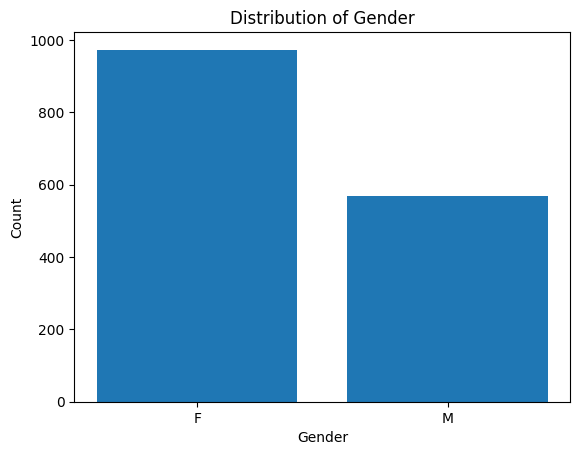

In [ ]:
# count number of males and females
gender_count=Data['GENDER'].value_counts()
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
print(Data)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0   180000.00000   
1     5009744      F         Y             N         0   315000.00000   
2     5009746      F         Y             N         0   315000.00000   
3     5009749      F         Y             N         0   191399.32623   
4     5009752      F         Y             N         0   315000.00000   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0   191399.32623   
1544  5023655      F         N             N         0   225000.00000   
1545  5115992      M         Y             Y         2   180000.00000   
1546  5118219      M         Y             N         0   270000.00000   
1547  5053790      F         Y             Y         0   225000.00000   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

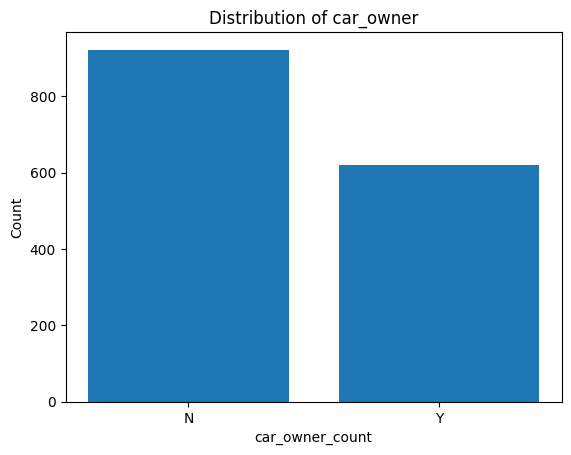

In [ ]:
# count number of car owner
car_owner_count=Data['Car_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(car_owner_count.index,car_owner_count.values)
plt.xlabel('car_owner_count')
plt.ylabel('Count')
plt.title('Distribution of car_owner')
plt.show()

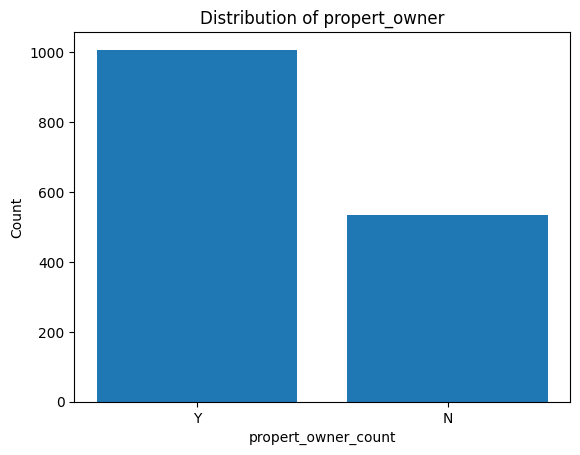

In [ ]:
# count number of propert_owner
propert_owner_count=Data['Propert_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(propert_owner_count.index,propert_owner_count.values)
plt.xlabel('propert_owner_count')
plt.ylabel('Count')
plt.title('Distribution of propert_owner')
plt.show()


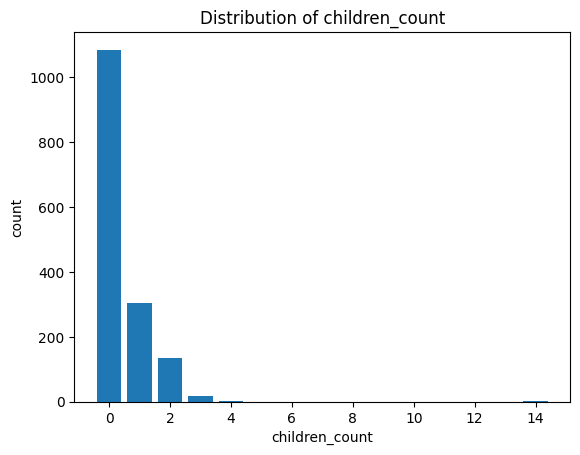

In [ ]:
# count number of children
children_count=Data['CHILDREN'].value_counts()
#creat barpolt using Matplotlib
plt.bar(children_count.index,children_count.values)
plt.xlabel('children_count')
plt.ylabel('count')
plt.title('Distribution of children_count')
plt.show()

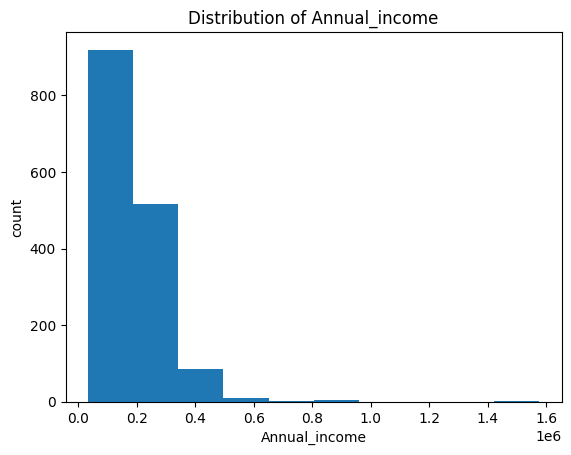

In [ ]:
# histograph on Annual_income
plt.hist(Data['Annual_income'], bins=10)
plt.xlabel('Annual_income')
plt.ylabel('count')
plt.title('Distribution of Annual_income')
plt.show()


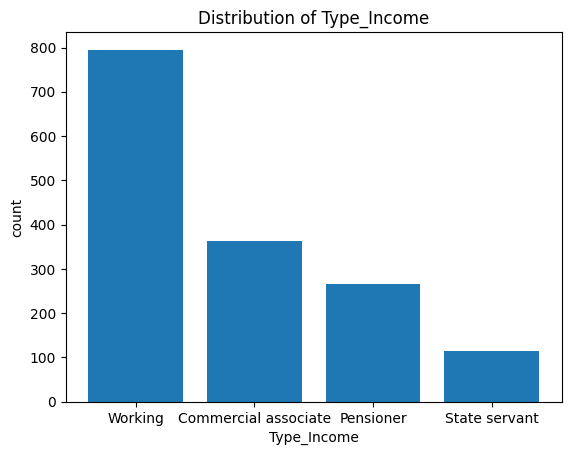

In [ ]:
# count number of Type_Income
Type_Income_count=Data['Type_Income'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Type_Income_count.index,Type_Income_count.values)
plt.xlabel('Type_Income')
plt.ylabel('count')
plt.title('Distribution of Type_Income')
plt.show()

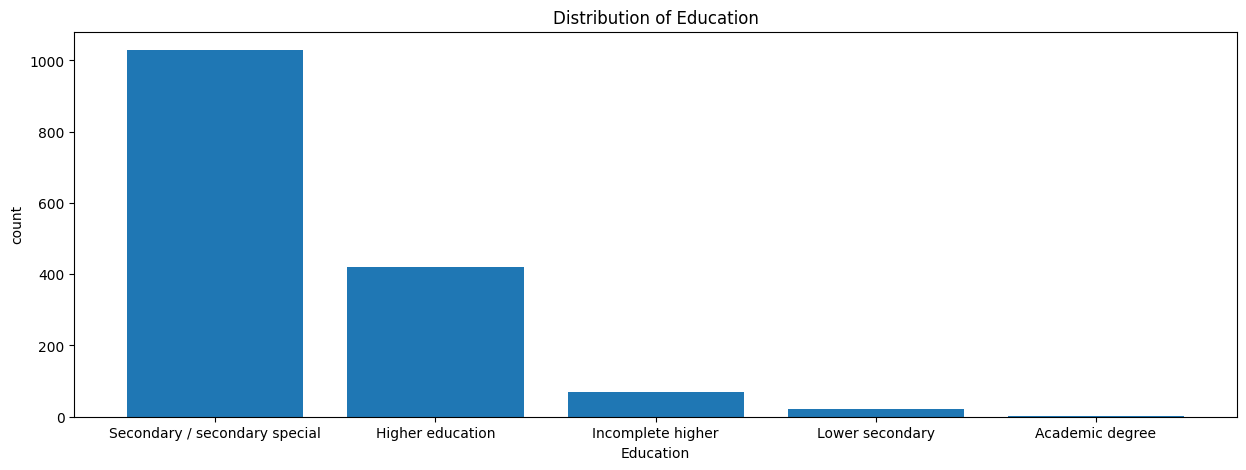

In [ ]:
# count number of Education
Education_count=Data['EDUCATION'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Education_count.index,Education_count.values)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Distribution of Education')
plt.show()

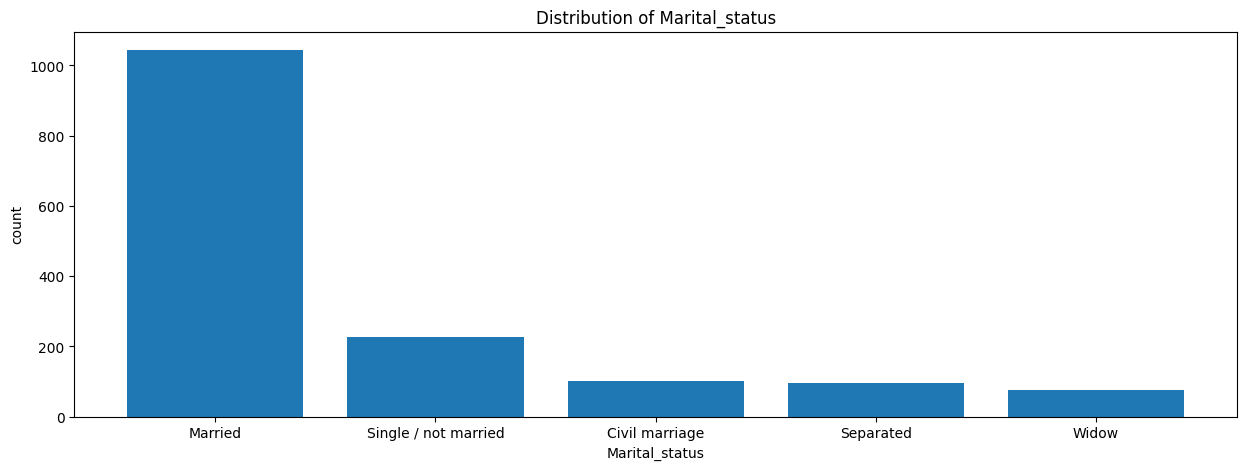

In [ ]:
# count number of Marital_status
Marital_status_count=Data['Marital_status'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()

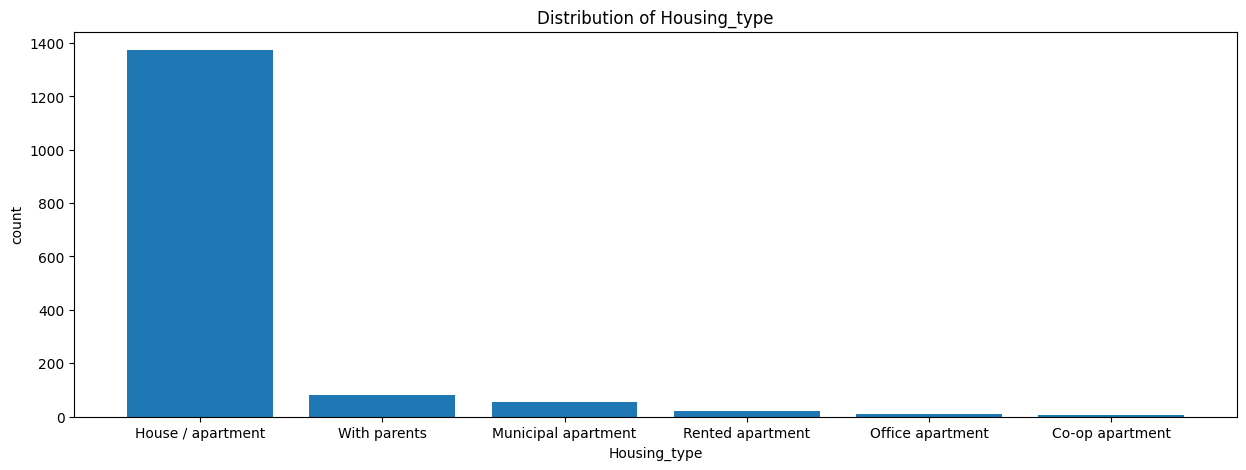

In [ ]:
# count number of Housing_type
Housing_type_count=Data['Housing_type'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Housing_type_count.index,Housing_type_count.values)
plt.xlabel('Housing_type')
plt.ylabel('count')
plt.title('Distribution of Housing_type')
plt.show()

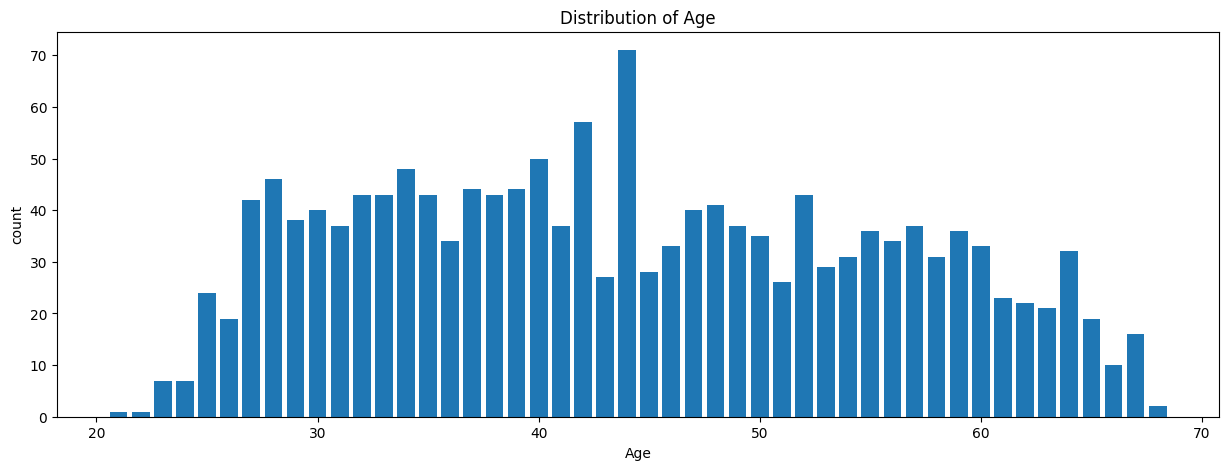

In [ ]:
# count number of Birthday_count
Birthday_count=Data['Age'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()

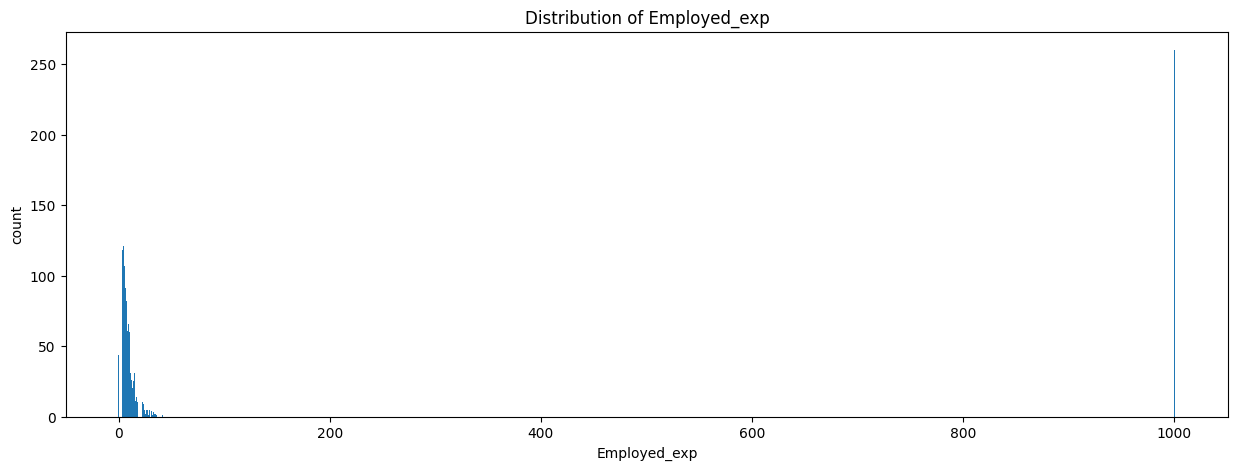

In [ ]:
# count number of Employed_days
Employed_days_count=Data['Employed_exp'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Employed_days_count.index,Employed_days_count.values)
plt.xlabel('Employed_exp')
plt.ylabel('count')
plt.title('Distribution of Employed_exp')
plt.show()

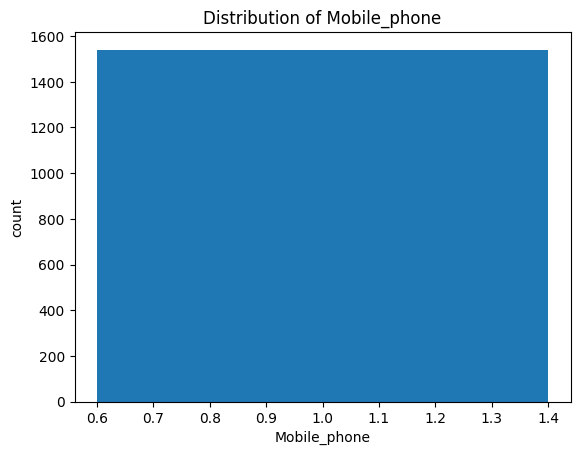

In [ ]:
# count number of Mobile_phone
Mobile_phone_count=Data['Mobile_phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Mobile_phone_count.index,Mobile_phone_count.values)
plt.xlabel('Mobile_phone')
plt.ylabel('count')
plt.title('Distribution of Mobile_phone')
plt.show()

From this graph we got to know every one has one phone number.

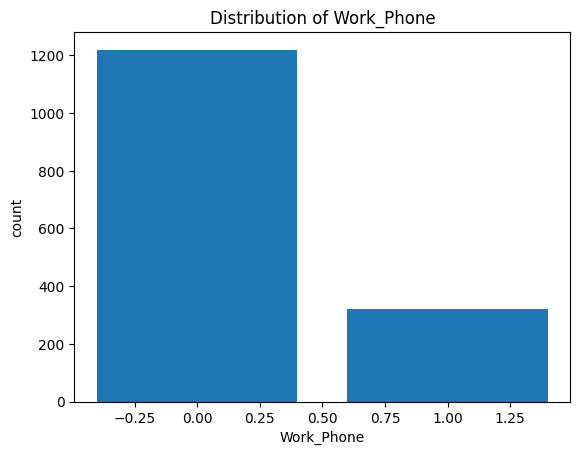

In [ ]:
# count number of Work_Phone
Work_Phone_count=Data['Work_Phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Work_Phone_count.index,Work_Phone_count.values)
plt.xlabel('Work_Phone')
plt.ylabel('count')
plt.title('Distribution of Work_Phone')
plt.show()

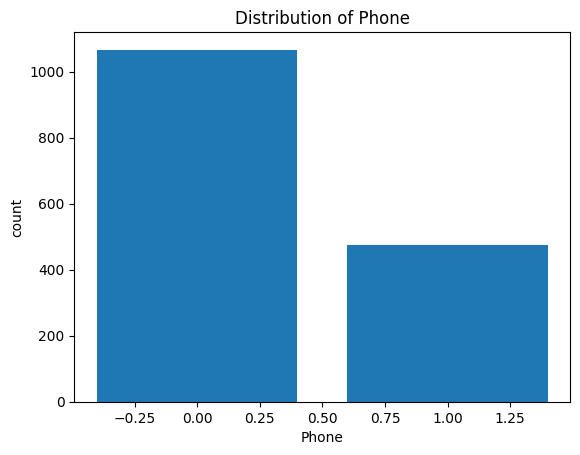

In [ ]:
# count number of Phone
Phone_count=Data['Phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Phone_count.index,Phone_count.values)
plt.xlabel('Phone')
plt.ylabel('count')
plt.title('Distribution of Phone')
plt.show()


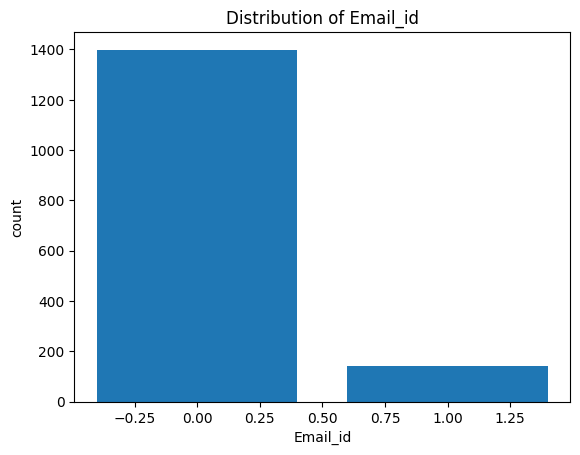

In [ ]:
# count number of Email_id
Email_id_count=Data['EMAIL_ID'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Email_id_count.index,Email_id_count.values)
plt.xlabel('Email_id')
plt.ylabel('count')
plt.title('Distribution of Email_id')
plt.show()

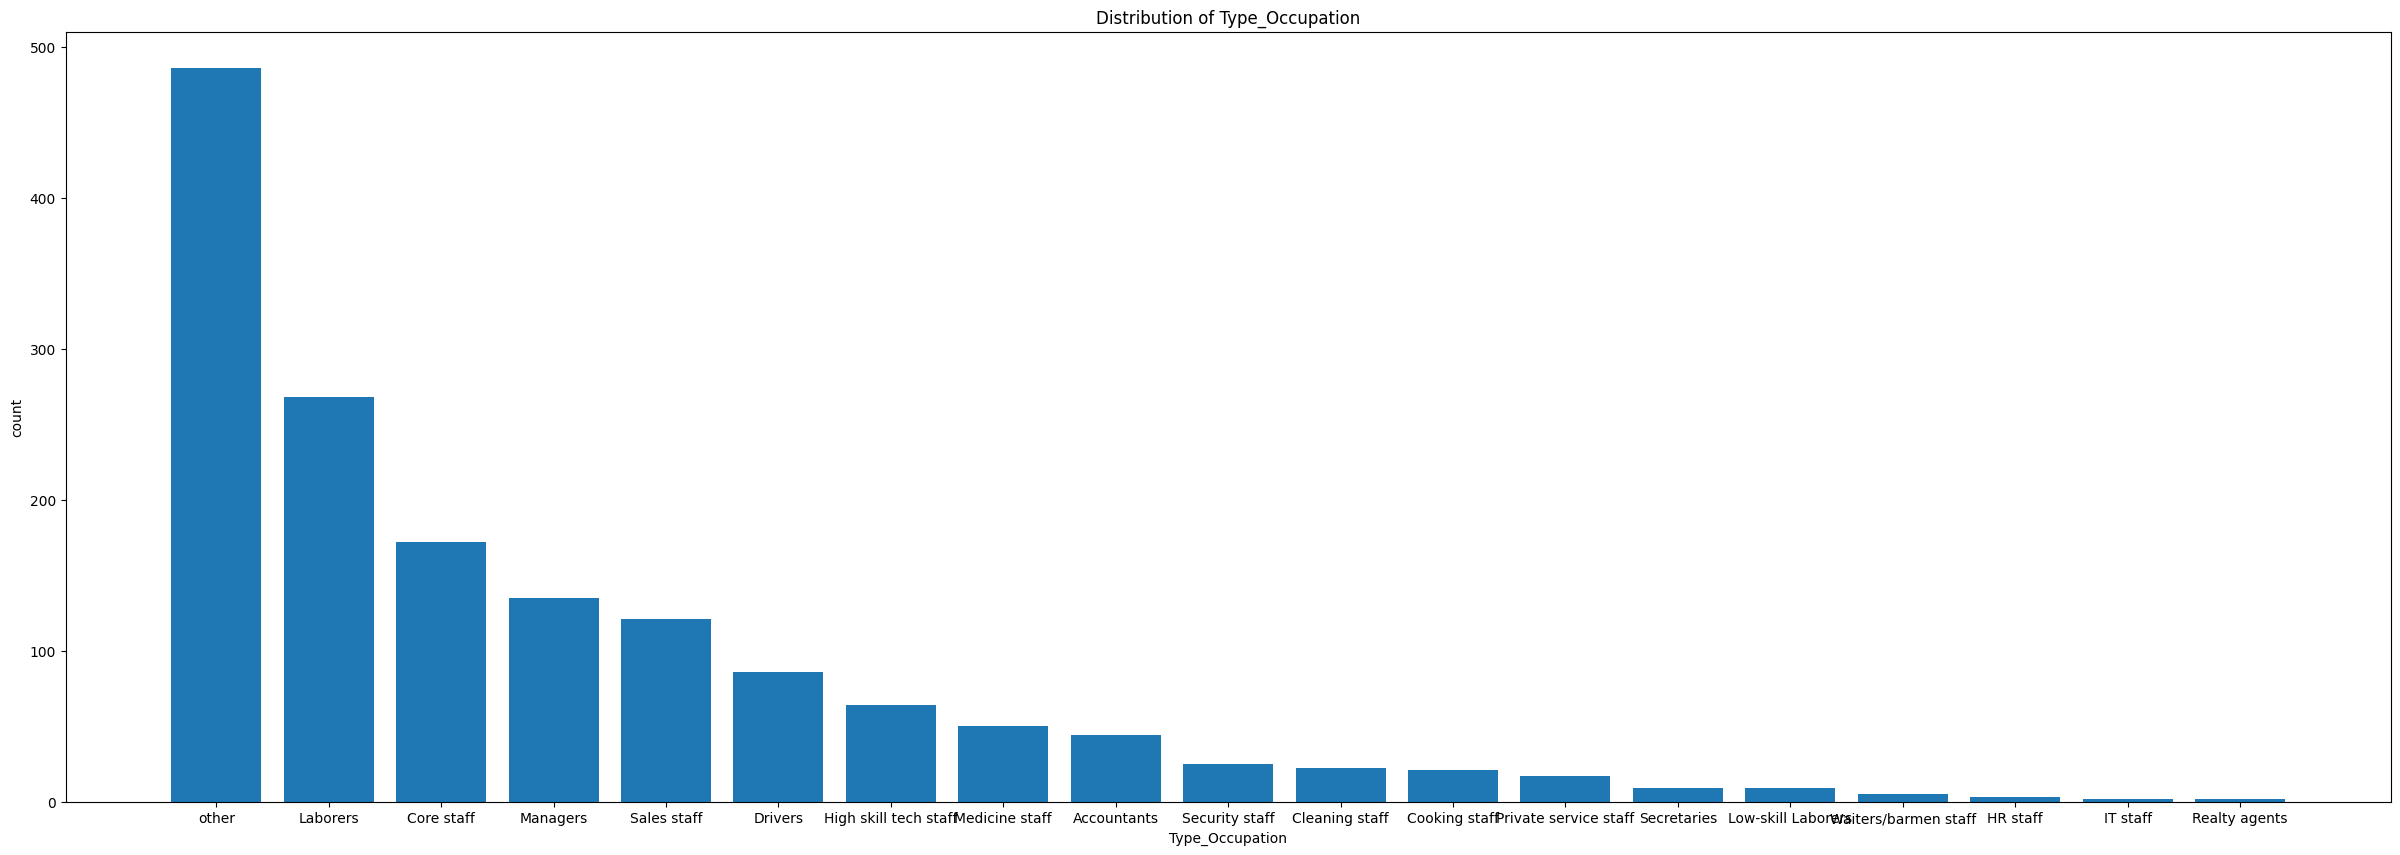

In [ ]:
# count number of Type_Occupation
Type_Occupation_count=Data['Type_Occupation'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()


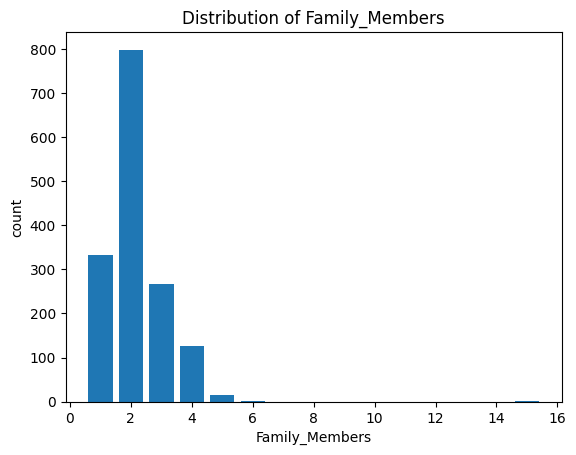

In [ ]:
# count number of Family_Members
Family_Members_count=Data['Family_Members'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Family_Members_count.index,Family_Members_count.values)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()

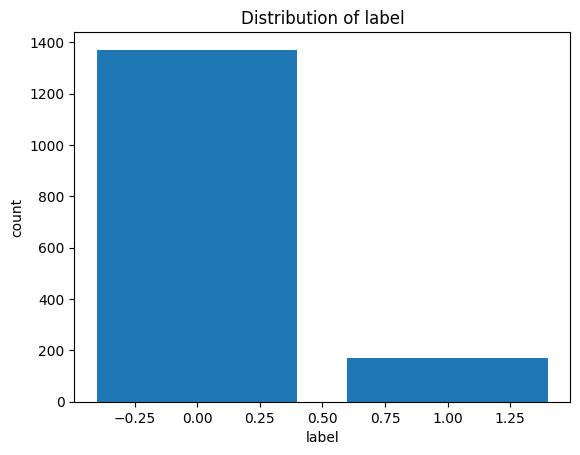

In [ ]:
# count number of label
label_count=Data['label'].value_counts()
#creat barpolt using Matplotlib
plt.bar(label_count.index,label_count.values)
plt.xlabel('label')
plt.ylabel('count')
plt.title('Distribution of label')
plt.show()

In [ ]:
Data.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1



# Relation between categorical variables:

We have seen some relationship by plotting graph now we are going to see relation between categorical variables

In [ ]:
# Find out the correlation between variables using spearman rank correlation
df = Data.corr(method='spearman')
df


<ipython-input-163-57485d8ee3a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = Data.corr(method='spearman')


,Ind_ID,CHILDREN,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.026155,-0.011117,-0.023564,-0.045607,NaN,0.088004,0.007702,-0.044812,0.007507,0.016660
CHILDREN,0.026155,1.000000,0.064120,-0.336771,-0.175858,NaN,0.040402,0.014571,0.055700,0.814514,-0.014037
Annual_income,-0.011117,0.064120,1.000000,-0.106760,-0.096585,NaN,-0.069633,-0.020205,0.116949,0.039158,-0.000154
Age,-0.023564,-0.336771,-0.106760,1.000000,0.554079,NaN,-0.164662,0.036688,-0.161943,-0.276376,0.048210
Employed_exp,-0.045607,-0.175858,-0.096585,0.554079,1.000000,NaN,-0.136358,0.007384,-0.158200,-0.148986,-0.062420
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.088004,0.040402,-0.069633,-0.164662,-0.136358,NaN,1.000000,0.353164,-0.008726,0.086653,-0.007203
Phone,0.007702,0.014571,-0.020205,0.036688,0.007384,NaN,0.353164,1.000000,0.015692,0.019702,-0.001799
EMAIL_ID,-0.044812,0.055700,0.116949,-0.161943,-0.158200,NaN,-0.008726,0.015692,1.000000,0.054068,0.009560
Family_Members,0.007507,0.814514,0.039158,-0.276376,-0.148986,NaN,0.086653,0.019702,0.054068,1.000000,-0.025891


<Axes: >

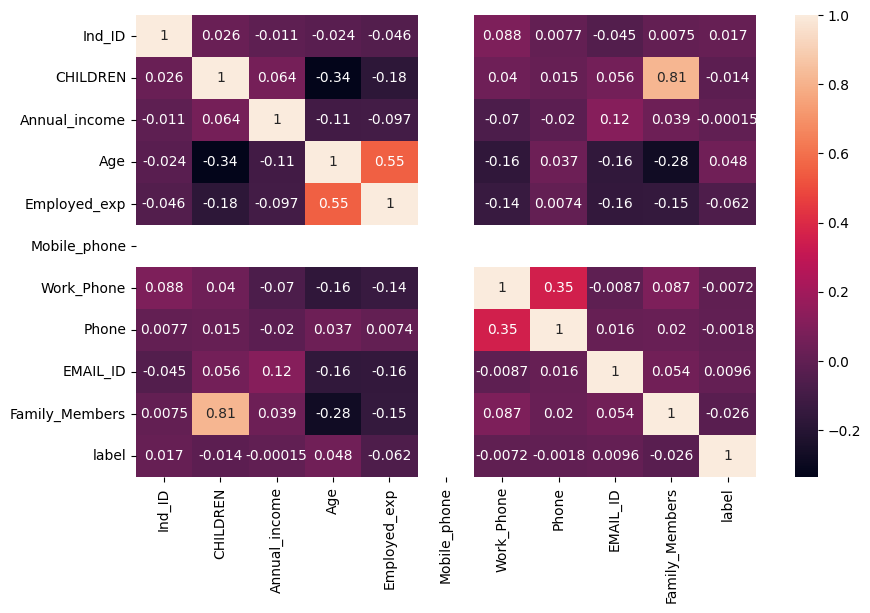

In [ ]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df,annot=True)

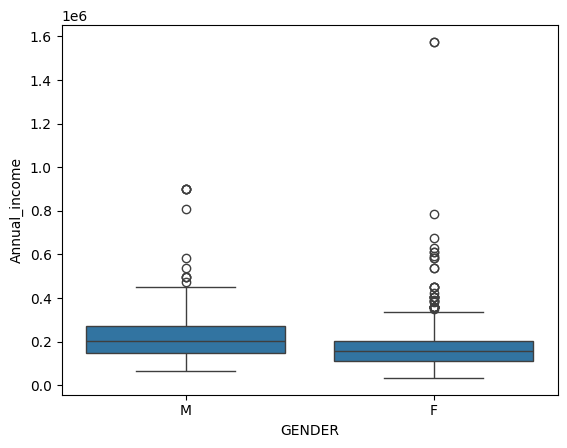

In [ ]:
sns.boxplot(x ='GENDER',y ="Annual_income",data=Data)
plt.show()

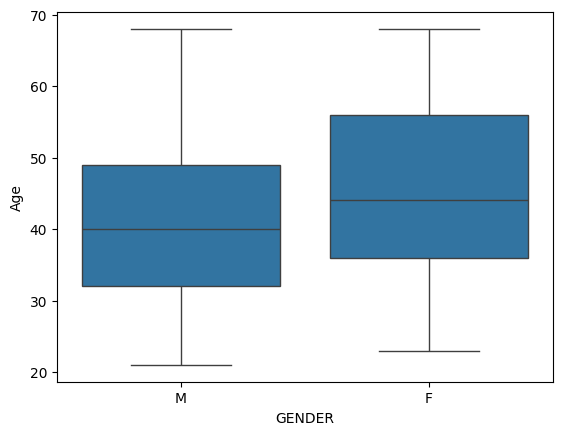

In [ ]:
sns.boxplot(x ='GENDER',y ="Age",data=Data)
plt.show()

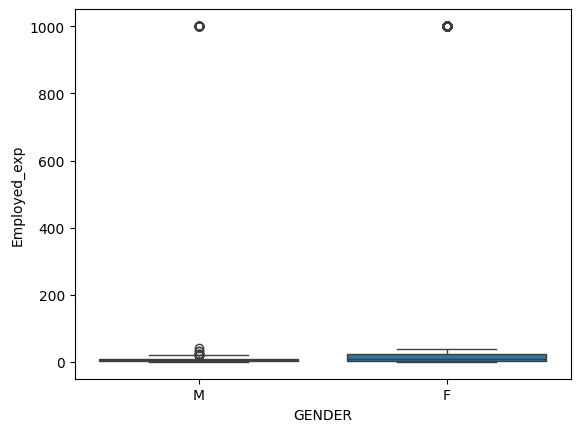

In [ ]:
sns.boxplot(x ='GENDER',y ="Employed_exp",data=Data)
plt.show()

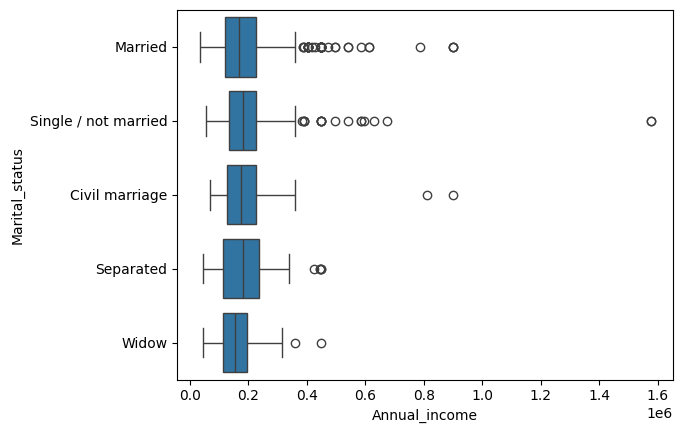

In [ ]:
sns.boxplot(x ='Annual_income',y ="Marital_status",data=Data)
plt.show()

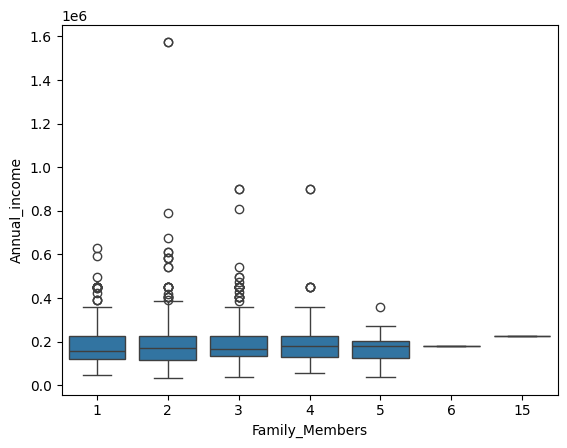

In [ ]:
sns.boxplot(x ='Family_Members',y ="Annual_income",data=Data)
plt.show()

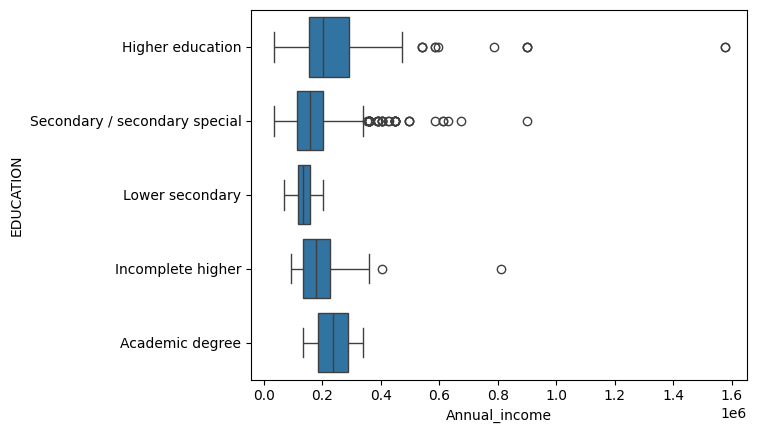

In [ ]:
sns.boxplot(x ='Annual_income',y ="EDUCATION",data=Data)
plt.show()

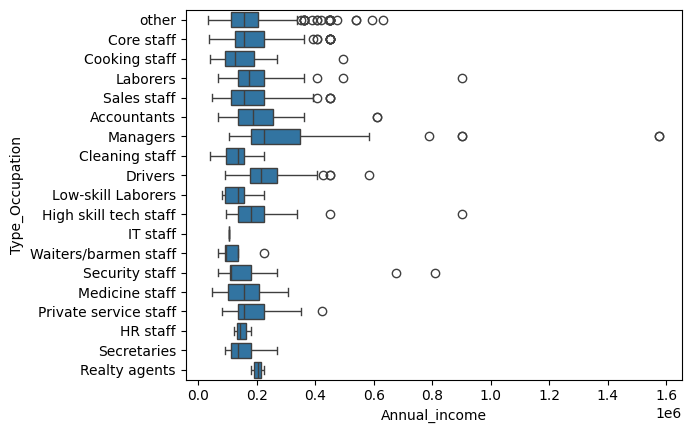

In [ ]:
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=Data)
plt.show()

In [ ]:
Data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [ ]:
# removing unused columns
Data = Data.drop(['Ind_ID', 'Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis=1)

# Feature Engineering:

In [ ]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in Data:
  if Data[col].dtype=='object':
    Data[col]=le.fit_transform(Data[col])

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   int64  
 1   Car_Owner        1541 non-null   int64  
 2   Propert_Owner    1541 non-null   int64  
 3   CHILDREN         1541 non-null   int64  
 4   Annual_income    1541 non-null   float64
 5   Type_Income      1541 non-null   int64  
 6   EDUCATION        1541 non-null   int64  
 7   Marital_status   1541 non-null   int64  
 8   Housing_type     1541 non-null   int64  
 9   Age              1541 non-null   float64
 10  Employed_exp     1541 non-null   float64
 11  Type_Occupation  1541 non-null   int64  
 12  Family_Members   1541 non-null   int64  
 13  label            1541 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 180.6 KB


In [ ]:
Data.shape

(1541, 14)

[link text](https://)# Model Building:

In [ ]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = Data.iloc[:,0:-1]
y = Data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(463, 13)

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(1078, 13)

In [ ]:
# count the number rows for y_test
y_test.shape

(463,)

In [ ]:
# count the number rows for y_train
y_train.shape

(1078,)

# Scaling:

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(1078, 13)
(463, 13)


 Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.

# Logistic Regression:






In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train))
print("logistic regression testing set:",logreg.score(x_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 0.10946196660482375
logistic regression testing set: 0.11231101511879049
Accuracy of logistic regression classifier:  0.8876889848812095
[[411   0]
 [ 52   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# cross validation:

The cross-validation is done using the ShuffleSplit method

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.88673139 0.8802589  0.8802589  0.88349515 0.91262136 0.90614887
 0.90291262 0.88996764 0.86731392 0.90291262]
0.8912621359223302


# Decision Tree:

In [ ]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 0.9944341372912802
decision tree testing set: 0.8336933045356372
Accuracy: 0.8336933045356372
[[365  46]
 [ 31  21]]


In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.86407767 0.8802589  0.85760518 0.86407767 0.86084142 0.91585761
 0.89320388 0.84789644 0.84466019 0.87378641]
0.8702265372168284


# XG boost:

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train))
print("xg testing set:",xg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

xg training set: 0.9944341372912802
xg testing set: 0.9136069114470843
Accuracy: 0.9136069114470843
[[402   9]
 [ 31  21]]


In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.90614887 0.93203883 0.90291262 0.91909385 0.9223301  0.90938511
 0.93203883 0.88996764 0.94498382 0.91909385]
0.9177993527508091


# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train))
print("rf testing set:",rf.score(x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 0.9944341372912802
rf testing set: 0.9244060475161987
Random Forest classifier has accuracy of:  0.9244060475161987
[[408   3]
 [ 32  20]]


In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.92556634 0.93527508 0.92880259 0.91262136 0.94498382 0.91585761
 0.94174757 0.92880259 0.89644013 0.90614887]
0.9236245954692557


# conclusion:


Hence we got accuracy on different classification

-logisitic regression got accuracy 88%

-DecisionTree got accuracy 85%

-xg boosting got accuracy 90%

-Random Forest got accuracy 92%


Random Forest is having the highest Cross Validation Score with 0.922 followed by XGBoost with  0.909.

Based on all the model evaluation techniques we can say that Random Forest is the best model for our project to predict credit card approval.

Now we are going to use hyperparameter tuning to improve the performance of the model.

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

 After doing all the steps we found out the following features is the most important that can affect the model's performance--



1.   Type of income
2.   Education



Based on the results of our analysis, we recommend that the company focus on targeting customers who has a stable job with a regular salary may be seen as a lower risk than someone who earns irregular income from freelance work or self-employment. Our findings also suggest that the level of education is an important factor in credit card approval, indicating that the company may want to consider offering more targeted credit products for customers with different education levels.

# SQL QUESTIONS:

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('Data',Data)
conn.execute("select * from Data").fetchdf().head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.00000,1,1,1,1,51.0,1001.0,18,2,1
1,0,1,0,0,315000.00000,0,1,1,1,37.0,2.0,18,2,1
2,0,1,0,0,315000.00000,0,1,1,1,44.0,2.0,18,2,1
3,0,1,0,0,191399.32623,0,1,1,1,37.0,2.0,18,2,1
4,0,1,0,0,315000.00000,0,1,1,1,37.0,2.0,18,2,1
5,0,1,0,0,315000.00000,0,1,1,1,37.0,2.0,18,2,1
6,0,0,0,0,180000.00000,1,4,1,1,61.0,1001.0,18,2,1
7,1,1,1,1,450000.00000,0,4,1,1,50.0,2.0,3,3,1
8,1,1,1,1,450000.00000,1,4,1,1,50.0,2.0,3,3,1
9,1,1,1,1,450000.00000,0,4,3,1,50.0,2.0,3,1,1


-- Question 1: Group the customers based on their income type and find the average of their annual income.

In [ ]:
conn.execute("SELECT Type_income, ROUND(AVG(Annual_income),2) Average_Annual_Income FROM Data GROUP BY Type_income;").fetchdf()

,Type_Income,Average_Annual_Income
0,0,233676.91
1,2,210130.43
2,1,155093.62
3,3,180375.18


-- Question 2: Find the female owners of cars and property.

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('Data',Data)
conn.execute("SELECT * FROM Data WHERE Car_Owner='Y' AND Propert_Owner='Y' AND GENDER = 'F'").fetchdf()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label


-- Question 3: Find the male customers who are staying with their families.

In [ ]:
conn.execute("SELECT * FROM Data WHERE Housing_type = 'With parents' AND GENDER = 'M'").fetchdf()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label


-- Question 4: Please list the top five people having the highest income.

In [ ]:
conn.execute("SELECT * FROM (SELECT * , DENSE_RANK() OVER (ORDER BY Annual_income DESC) DR FROM Data ) S WHERE DR <=5").fetchdf()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label,DR
0,0,1,1,1,1575000.0,0,1,3,1,28.0,7.0,10,2,0,1
1,0,1,1,1,1575000.0,0,1,3,1,28.0,7.0,10,2,0,1
2,1,0,1,1,900000.0,3,4,1,1,42.0,12.0,8,3,0,2
3,1,1,1,2,900000.0,0,1,1,1,27.0,3.0,10,4,0,2
4,1,1,1,2,900000.0,0,1,1,1,27.0,3.0,10,4,0,2
5,1,1,1,1,900000.0,0,1,0,1,46.0,7.0,6,3,0,2
6,1,1,1,1,810000.0,0,2,0,3,49.0,9.0,16,3,0,3
7,0,0,1,0,787500.0,2,1,1,1,47.0,4.0,10,2,0,4
8,0,0,1,1,675000.0,0,4,3,1,42.0,2.0,16,2,1,5


-- Question 5: How many married people are having bad credit?


In [ ]:
conn.execute("SELECT Marital_status,COUNT(*) No_of_Bad_Credit FROM Data WHERE  label = 1 GROUP BY Marital_status HAVING Marital_status = 'Married'").fetchdf()

,Marital_status,No_of_Bad_Credit


-- Question 6: What is the highest education level and what is the total count?

In [ ]:
conn.execute("SELECT EDUCATION, count(*) No_of_people FROM Data GROUP BY EDUCATION HAVING EDUCATION = 'Higher education'").fetchdf()


,EDUCATION,No_of_people


-- Question 7: Between married males and females, who is having more bad credit?

In [ ]:
conn.execute("WITH BAD_CREDIT AS (SELECT GENDER,COUNT(*) No_of_Bad_Credit FROM Data WHERE  label = 1 AND Marital_status = 'Married'GROUP BY GENDER) SELECT * FROM BAD_CREDIT ORDER BY No_of_Bad_Credit DESC LIMIT 1 ;").fetchdf()


,GENDER,No_of_Bad_Credit


# LMS Queries

# Why is our proposal important in today’s world? How predicting a good client is worthy for a bank?

The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

# How is it going to impact the banking sector?

predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk.

Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

# If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

 If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency.  banks will need to ensure that they have access to reliable and comprehensive data sources.